# Procesamiento de señal de voz

Para el reconocimiento de voz a partir de un Modelo Oculto de Markov es necesario trabajar con señales acústicas. Aquí se pone un breve tutorial de como trabajar con audio en python. Para esto, necesitamos las siguientes librerías:

In [1]:
from scipy.io.wavfile import read
from scipy.signal import spectrogram
from matplotlib.pyplot import specgram
import numpy as np
import matplotlib.pyplot as plt

La función read($\cdot$) nos servirá para leer un archivo de audio con extensión *.wav 

In [2]:
A = read('grab.wav')

Podemos ver la señal completa de la palabra. En este caso, observamos el oscilograma del sonido dado a partir de plotear la señal.

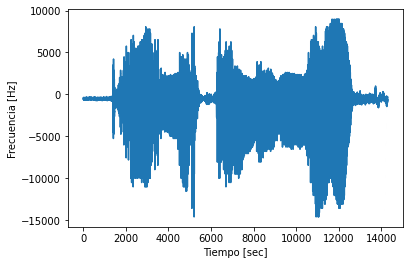

In [3]:
plt.plot(A[1])
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

También podemos ver el espectograma de la palabra a partir de la función specgram(). En el espectograma pueden observarse elementos relevantes (formantes) que permiten a un experto detectar de qué fonemas está compuesta la palabra. La computadora trata de emular este proceso.

[-440 -560 -528 ... -720 -312 -312]


<ipython-input-4-0b439c7bf61a>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t[:63], f[:100], 10*np.log10(Sxx[:63,:100]))


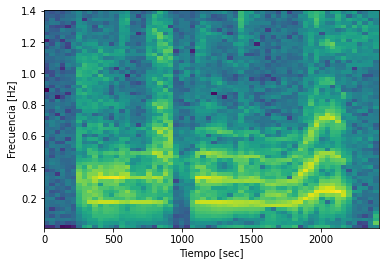

In [4]:
print(A[1])
t, f, Sxx = spectrogram(A[1], 10e3)
plt.pcolormesh(t[:63], f[:100], 10*np.log10(Sxx[:63,:100]))
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()

Entonces, podemos definir una función para segmentar la señal por intervalos de tiempo de la siguiente forma.

In [5]:
def split(arr, size):
     arrs = []
     while len(arr) > size:
         pice = arr[:size]
         arrs.append(pice)
         arr   = arr[size:]
     arrs.append(arr)
     return arrs
    
Phones = split(A[1], 100)

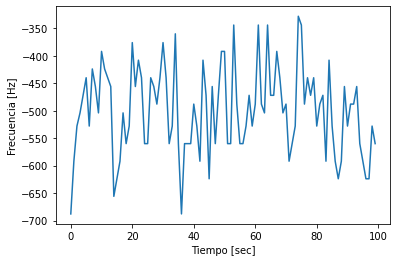

In [6]:
plt.plot(Phones[1])
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.show()